In [10]:
import logging
import random

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import sklearn

In [34]:
df = pd.read_csv('/Users/matthewdmeans/Desktop/BWU4/DS/airbnb.csv')

In [20]:
df = df.drop(columns=['Prop_encoded', 'cancel_encoded'])

In [35]:
df.head()

,Unnamed: 0,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,0,78704.0,500.000000,1.0,1.0,97.000000,2.0,25.0,1.0,1.0,1.0,1.0,2.0,85.0
1,1,78704.0,977.818033,2.0,1.0,94.505901,4.0,0.0,1.0,1.0,0.0,1.0,0.0,790.0
2,2,78704.0,977.818033,1.0,1.0,100.000000,2.0,75.0,1.0,1.0,0.0,1.0,2.0,75.0
3,3,78704.0,977.818033,1.0,1.0,94.505901,2.0,0.0,1.0,1.0,0.0,1.0,2.0,195.0
4,4,78704.0,977.818033,1.0,1.0,94.505901,2.0,0.0,1.0,1.0,1.0,1.0,0.0,200.0


In [36]:
dataset = df.values

In [37]:
X = dataset[:,0:10]
y = dataset[:,10]
y = np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [38]:
scaler_x.fit(X)
xscale=scaler_x.transform(X)
scaler_y.fit(y)
yscale=scaler_y.transform(y)

In [39]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [40]:
model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/50
1014/1014 [==============================] - 1s 1ms/step - loss: 0.2209 - mse: 0.2209 - mae: 0.4370 - val_loss: 0.2177 - val_mse: 0.2177 - val_mae: 0.4381ss: 0.2218 - mse: 0.2218 - mae: 0.43
Epoch 2/50
1014/1014 [==============================] - 1s 1ms/step - loss: 0.2131 - mse: 0.2131 - mae: 0.4269 - val_loss: 0.2160 - val_mse: 0.2160 - val_mae: 0.4275
Epoch 3/50
1014/1014 [==============================] - 1s 1ms/step - loss: 0.2123 - mse: 0.2123 - mae: 0.4246 - val_loss: 0.2159 - val_mse: 0.2159 - val_mae: 0.4243
Epoch 4/50
1014/1014 [==============================] - 1s 1ms/step - loss: 0.2120 - mse: 0.2120 - mae: 0.4238 - val_loss: 0.2153 - val_mse: 0.2153 - val_mae: 0.4259
Epoch 5/50
1014/1014 [==============================] - 1s 1ms/step - loss: 0.2117 - mse: 0.2117 - mae: 0.4237 - val_loss: 0.2160 - val_mse: 0.2160 - val_mae: 0.4340
Epoch 6/50
1014/1014 [==============================] - 2s 2ms/step - loss: 0.2116 - mse: 0.2116 - mae: 0.4230 - val_loss: 0.2149 - va

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


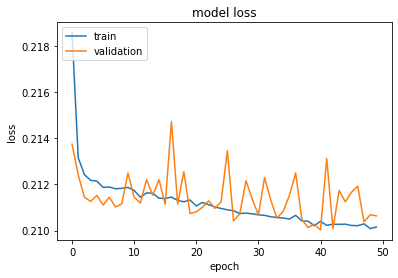

In [27]:
import matplotlib.pyplot as plt
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
Xnew = np.array([[10453.0, 1000.0, 2, 1, 97, 1, 0, 1, 1, 1]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[1.0453e+04 1.0000e+03 2.0000e+00 1.0000e+00 9.7000e+01 1.0000e+00
 0.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00], Predicted=[0.7606631]


In [42]:
model.evaluate(X_test, y_test)

660/660 [==============================] - 1s 819us/step - loss: 0.2107 - mse: 0.2107 - mae: 0.4222


[0.2107204645872116, 0.2107204645872116, 0.4222387969493866]

In [43]:
model.save('keras_nn_model.h5')